Required memory: 22 bit


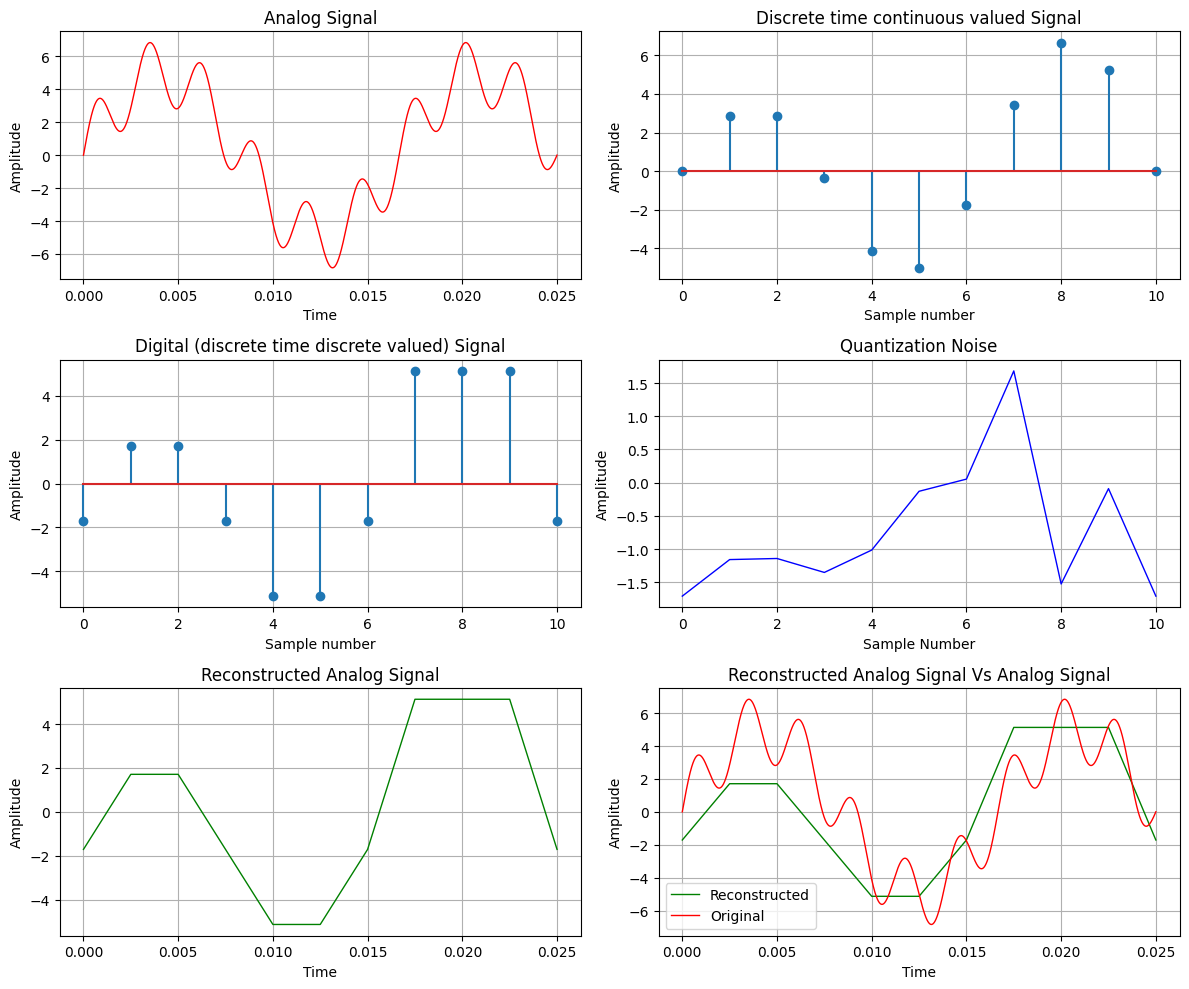

In [74]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 400    # Sampling frequency
bit = 2       # Bit depth
T = 1 / Fs        # Sampling period
StopTime = 0.025  # Duration in seconds

# Time vectors
t = np.arange(0, StopTime + 0.000001, 0.000001)
n = np.arange(0, (StopTime / T) + 1)
Fc = 60           # Frequency component for signal

# Generate analog signal
Ya = 5 * np.sin(2 * np.pi * Fc * t) + 2 * np.sin(2 * np.pi * 6 * Fc * t)

# Generate discrete signal (sampled)
y = 5 * np.sin(2 * np.pi * (Fc / Fs) * n) + 2 * np.sin(2 * np.pi * 6 * (Fc / Fs) * n)

# Quantization preparations
y_max = np.max(Ya)
y_min = np.min(Ya)
ns = len(y)
q_out = np.zeros(ns)

del_val = (y_max - y_min) / (2 ** bit)
low = y_min + (del_val / 2)
high = y_max - (del_val / 2)

# Quantization process
for h in np.arange(low, high + del_val, del_val):
    for b in range(ns):
        if ((h - del_val / 2) < y[b]) and (y[b] <= (h + del_val / 2)):
            q_out[b] = h

q_error = q_out - y
r_memory = bit * ns
print(f'Required memory: {r_memory} bit')

# Plotting
plt.figure(figsize=(12, 10))

# Analog Signal
plt.subplot(3, 2, 1)
plt.plot(t, Ya, 'r', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Analog Signal')
plt.grid(True)

# Discrete time continuous valued Signal
plt.subplot(3, 2, 2)
plt.stem(n, y)
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.title('Discrete time continuous valued Signal')
plt.grid(True)

# Digital (discrete time discrete valued) Signal
plt.subplot(3, 2, 3)
plt.stem(n, q_out)
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.title('Digital (discrete time discrete valued) Signal')
plt.grid(True)

# Quantization Noise
plt.subplot(3, 2, 4)
plt.plot(n, q_error, 'b', linewidth=1)
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.title('Quantization Noise')
plt.grid(True)

# Reconstructed Analog Signal
plt.subplot(3, 2, 5)
plt.plot(n * T, q_out, 'g', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Reconstructed Analog Signal')
plt.grid(True)

# Reconstructed Analog Signal Vs Analog Signal
plt.subplot(3, 2, 6)
plt.plot(n * T, q_out, 'g', linewidth=1, label='Reconstructed')
plt.plot(t, Ya, 'r', linewidth=1, label='Original')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Reconstructed Analog Signal Vs Analog Signal')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
